In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# https://files.grouplens.org/datasets/movielens/ml-100k-README.txt
# https://files.grouplens.org/datasets/movielens/ml-100k.zip

In [15]:
users = pd.read_csv('sample/u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])

In [16]:
users.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [17]:
# https://www.kaggle.com/datasets/abrahamanderson/movie-id-titles
movies = pd.read_csv('sample/Movie_Id_Titles')

In [18]:
movies.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [19]:
df= pd.merge(users, movies, on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [22]:
df.groupby('title').agg({'rating':'mean'})\
    .sort_values(by='rating', ascending=False)\
    .head()

,rating
title,
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0


In [23]:
df.groupby('title')['rating'].count()\
    .sort_values(ascending=False).head()

title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [24]:
# Averge rating 
ratings= pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [25]:
# Rating counts
ratings['rating_counts']= pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,rating_counts
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


Text(0, 0.5, 'count of rating')

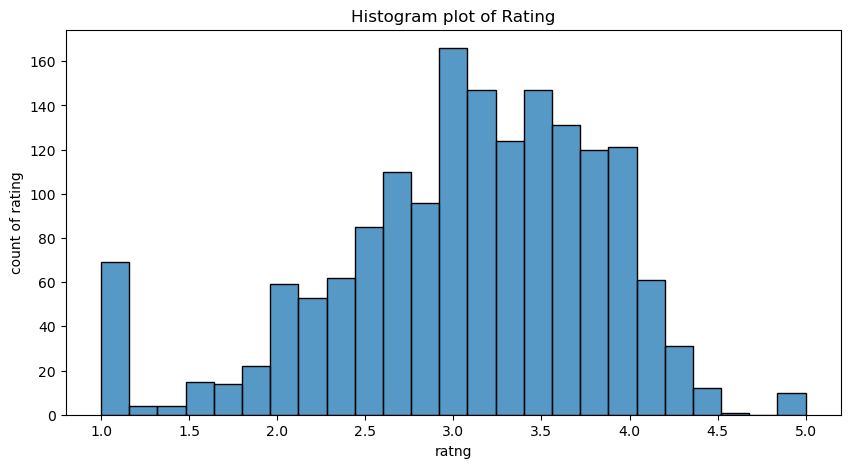

In [26]:
plt.figure(figsize=(10,5))
sns.histplot(ratings['rating'])
plt.title("Histogram plot of Rating")
plt.xlabel('ratng')
plt.ylabel('number of rating')

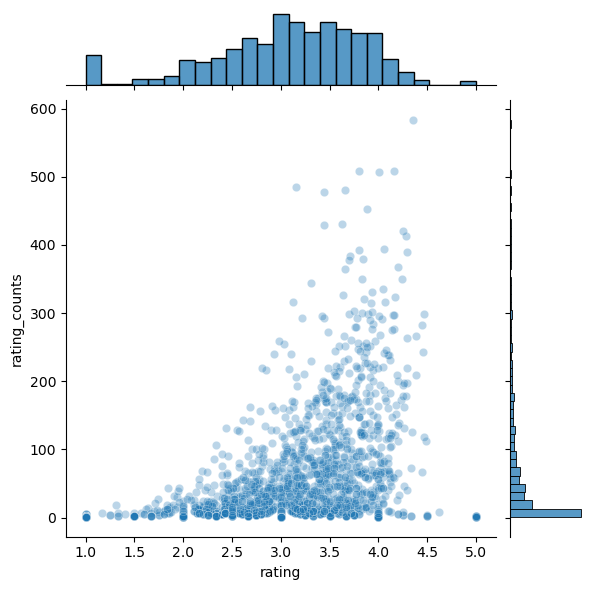

In [31]:
sns.jointplot(x='rating',y='rating_counts', data=ratings, alpha=0.3)

In [34]:
movies_reco = df.pivot_table(index='user_id', columns='title',values='rating').fillna(0)
movies_reco.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0


In [43]:
starwars_user_ratings = movies_reco['Star Wars (1977)']
contact_user_ratings = movies_reco['Contact (1997)']

In [42]:
starwars_user_ratings

user_id
1      5.0
2      5.0
3      NaN
4      5.0
5      4.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 943, dtype: float64

In [44]:
contact_user_ratings

user_id
1      5.0
2      3.0
3      2.0
4      5.0
5      0.0
      ... 
939    4.0
940    5.0
941    4.0
942    4.0
943    0.0
Name: Contact (1997), Length: 943, dtype: float64

In [41]:
# corrwith is a pandas DataFrame method that computes pairwise correlation 
# between rows or columns of two DataFrame objects. It's commonly used to calculate correlation 
# between the columns of one DataFrame with the columns or rows of another DataFrame
# ranges from -1 to 1
movies_reco.corrwith(starwars_user_ratings)

title
'Til There Was You (1997)               -0.002603
1-900 (1994)                            -0.155049
101 Dalmatians (1996)                    0.014742
12 Angry Men (1957)                      0.080886
187 (1997)                              -0.045616
                                           ...   
Young Guns II (1990)                     0.089668
Young Poisoner's Handbook, The (1995)    0.008854
Zeus and Roxanne (1997)                  0.018152
unknown                                  0.021673
Á köldum klaka (Cold Fever) (1994)      -0.016875
Length: 1664, dtype: float64

In [45]:
similar_starwars = movies_reco.corrwith(starwars_user_ratings)
simliar_contact = movies_reco.corrwith(contact_user_ratings)

In [46]:
corr_starwars = pd.DataFrame(similar_starwars ,columns=['Correlation'])
corr_contact = pd.DataFrame(simliar_contact ,columns=['Correlation'])

In [47]:
corr_starwars

,Correlation
title,
'Til There Was You (1997),-0.008917
1-900 (1994),-0.009002
101 Dalmatians (1996),0.155780
12 Angry Men (1957),0.213142
187 (1997),-0.034590
...,...
Young Guns II (1990),0.137691
"Young Poisoner's Handbook, The (1995)",-0.002721
Zeus and Roxanne (1997),-0.007730


In [49]:
corr_contact

,Correlation
title,
'Til There Was You (1997),-0.015166
1-900 (1994),-0.058033
101 Dalmatians (1996),0.042442
12 Angry Men (1957),-0.051922
187 (1997),0.097278
...,...
Young Guns II (1990),-0.000393
"Young Poisoner's Handbook, The (1995)",0.055780
Zeus and Roxanne (1997),-0.001929


In [38]:
corr_starwars.dropna(inplace=True)
corr_contact.dropna(inplace=True)

In [50]:
corr_starwars= corr_starwars.join(ratings['rating_counts'])
corr_contact= corr_contact.join(ratings['rating_counts'])

In [52]:
# Cosidering more than 100 users watched that movies
corr_starwars[corr_starwars['rating_counts']>100]\
    .sort_values(by='Correlation', ascending=False).head()

,Correlation,rating_counts
title,,
Star Wars (1977),1.000000,583
Return of the Jedi (1983),0.748753,507
"Empire Strikes Back, The (1980)",0.554549,367
Raiders of the Lost Ark (1981),0.541920,420
Indiana Jones and the Last Crusade (1989),0.468690,331


In [53]:
corr_contact[corr_contact['rating_counts']>100]\
    .sort_values(by='Correlation', ascending=False).head()

,Correlation,rating_counts
title,,
Contact (1997),1.000000,509
"Saint, The (1997)",0.293369,316
Conspiracy Theory (1997),0.271387,295
Air Force One (1997),0.271253,431
G.I. Jane (1997),0.269657,175
